In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt

Hi! I want to practice using Git, so I'm going to write up a short simple code and try to do all those old Git things to it, it was one thing to practice them in the "Learn Git Branching" site but it's another to do it in "real life". I want to try to follow along with the "Learn Git Branching" tutorials with this code and see if it helps me understand it better. I'm going to use some code from ``FinalProject.ipynb`` since it has several parts that I can add in and take out and it's not too complex. It deals with graphing different Lorenz attractors.

In [2]:
#constants
P = 10
R = 28
B = 8/3
y_init1 = np.array([20,20,20])

In [3]:
@nb.njit()
def RK4(t,y,dt,F): #y is current y, t is current time, dt is size of time step, F is dy/dt
    k1 = dt*F(t,y)
    k2 = dt*F(t + (1/2)*dt, y + (1/2)*k1)
    k3 = dt*F(t + (1/2)*dt, y + (1/2)*k2)
    k4 = dt*F(t + dt, y + k3)
    y_step = (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y_step #next y will be current y plus this quantity in the return statement

#this one can take sets of diffy q's
@nb.njit()
def RK4_solve(y_in,T,N,F): #initial y value, final t value, length of t array, and dy/dt function, respectively
    t_arr = np.linspace(0,T,N)
    y_mat = np.zeros((len(y_in),N))
    y_mat[:,0] = y_in
    dt = t_arr[1]-t_arr[0]
    for i in range(1,N):
        y_mat[:,i] = y_mat[:,i-1] + RK4(t_arr[i-1],y_mat[:,i-1],dt,F)
    return t_arr,y_mat

@nb.njit()
def der1(t,y):
    X, Y, Z = y
    d = np.zeros(len(y))
    d[0] = P*(Y-X)
    d[1] = R*X - Y - X*Z
    d[2] = X*Y - B*Z
    return d

In [4]:
t_array1, xyz1 = RK4_solve(y_init1,1000,1000000,der1)

In [5]:
def make3_graphs(xyz):
    plt.figure(figsize=(8,8))
    plt.plot(xyz[0,:],xyz[1,:],linewidth=0.1,color='k')
    plt.xlabel("x",fontsize=16)
    plt.ylabel("y",fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.show()

    plt.figure(figsize=(8,8))
    plt.plot(xyz[0,:],xyz[2,:],linewidth=0.1,color='k')
    plt.xlabel("x",fontsize=16)
    plt.ylabel("z",fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.show()

    plt.figure(figsize=(8,8))
    plt.plot(xyz[0,:],xyz[1,:],linewidth=0.1,color='k')
    plt.xlabel("y",fontsize=16)
    plt.ylabel("z",fontsize=16)
    plt.tick_params(axis='x', labelsize=14)
    plt.tick_params(axis='y', labelsize=14)
    plt.show()

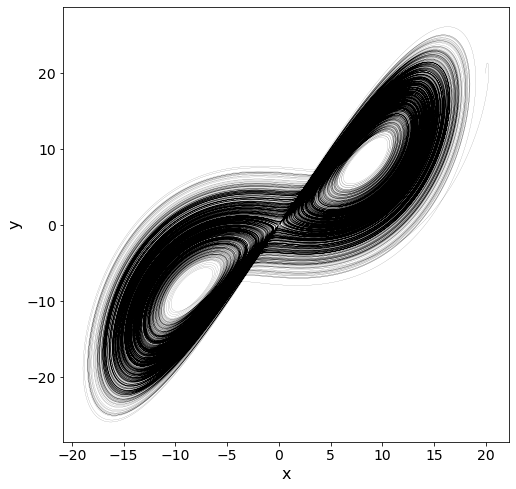

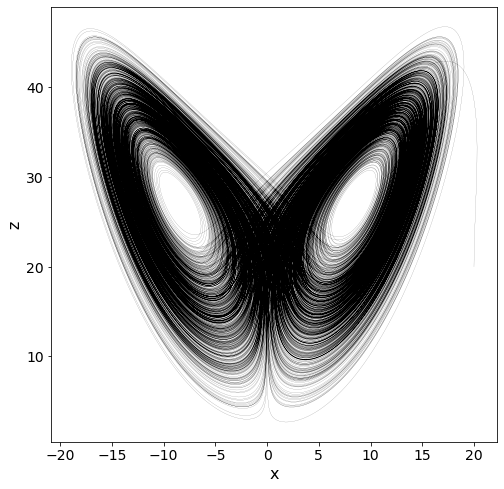

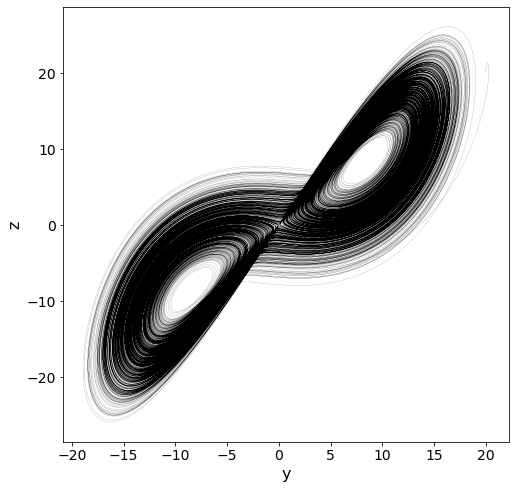

In [6]:
make3_graphs(xyz1)